In [240]:
import pandas as pd

In [241]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Age of the house the moment it was sold Vs it price

In [242]:
df_ = df[df['yr_renovated']==0][['id','yr_built','date','price','yr_renovated']].copy()

def get_age(end_year, start_year):
    if start_year ==0:
        return 'n/a'
    return end_year - start_year


df_['age (sold - built)'] = df_.apply(lambda row: get_age(
    pd.to_datetime(row['date']).year, row['yr_built']), axis=1)


df_

,id,yr_built,date,price,yr_renovated,age (sold - built)
0,7129300520,1955,20141013T000000,221900.0,0,59
2,5631500400,1933,20150225T000000,180000.0,0,82
3,2487200875,1965,20141209T000000,604000.0,0,49
4,1954400510,1987,20150218T000000,510000.0,0,28
5,7237550310,2001,20140512T000000,1230000.0,0,13
...,...,...,...,...,...,...
21608,263000018,2009,20140521T000000,360000.0,0,5
21609,6600060120,2014,20150223T000000,400000.0,0,1
21610,1523300141,2009,20140623T000000,402101.0,0,5
21611,291310100,2004,20150116T000000,400000.0,0,11


In [243]:
df_['age (sold - built)'].value_counts()

age (sold - built)
 9      473
 8      443
 11     432
 0      430
 10     428
       ... 
 113     27
 115     21
 81      16
 80      12
-1       12
Name: count, Length: 117, dtype: int64

In [244]:
df_[df_['age (sold - built)']<0].sort_values('date')

,id,yr_built,date,price,yr_renovated,age (sold - built)
21372,6169901185,2015,20140520T000000,490000.0,0,-1
17098,9126100346,2015,20140617T000000,350000.0,0,-1
8039,1250200495,2015,20140624T000000,455000.0,0,-1
1763,1832100030,2015,20140625T000000,597326.0,0,-1
20852,1257201420,2015,20140709T000000,595000.0,0,-1
20963,6058600220,2015,20140731T000000,230000.0,0,-1
19805,9126100765,2015,20140801T000000,455000.0,0,-1
14489,2770601530,2015,20140826T000000,500000.0,0,-1
20770,9310300160,2015,20140828T000000,357000.0,0,-1
2687,3076500830,2015,20141029T000000,385195.0,0,-1


In [245]:
# Replace negative age (sold - built) values by 0 to get a clean data set and avoid distortions

df_['age (sold - built)'] = df_.apply(lambda row: 0 if row['age (sold - built)']<0 else row['age (sold - built)'],axis=1)


In [246]:
df_ages_intervals = pd.cut(df_['age (sold - built)'], bins=10)

df_agg = df_.groupby(df_ages_intervals)[['price']].agg(['min', 'mean', 'max'])
df_agg


price                          
                         min           mean        max
age (sold - built)                                    
(-0.115, 11.5]      155000.0  608240.557356  5350000.0
(11.5, 23.0]        154000.0  608206.377386  6890000.0
(23.0, 34.5]        115000.0  531732.727665  5300000.0
(34.5, 46.0]         89000.0  474720.119958  3800000.0
(46.0, 57.5]         75000.0  447525.569588  3070000.0
(57.5, 69.0]         82000.0  457169.313086  3400000.0
(69.0, 80.5]         78000.0  446264.874046  3650000.0
(80.5, 92.0]        105500.0  595739.866543  3000000.0
(92.0, 103.5]        80000.0  542975.354223  2500000.0
(103.5, 115.0]       90000.0  609218.365243  3300000.0

In [247]:
[df['date'].min(),df['date'].max()]

['20140502T000000', '20150527T000000']

<Axes: title={'center': 'Relationship between house price and its age'}, xlabel='age (sold - built)'>

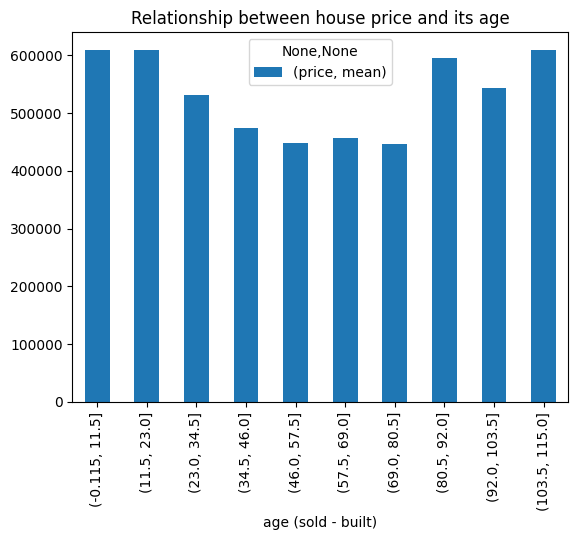

In [248]:
import matplotlib

df_agg.reset_index(inplace=True)

df_agg.plot.bar(x='age (sold - built)', y=('price','mean'),title="Relationship between house price and its age")

In [249]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [250]:
df_ = df[['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors']].copy()
df_

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,7129300520,3,1.00,1180,5650,1.0
1,6414100192,3,2.25,2570,7242,2.0
2,5631500400,2,1.00,770,10000,1.0
3,2487200875,4,3.00,1960,5000,1.0
4,1954400510,3,2.00,1680,8080,1.0
...,...,...,...,...,...,...
21608,263000018,3,2.50,1530,1131,3.0
21609,6600060120,4,2.50,2310,5813,2.0
21610,1523300141,2,0.75,1020,1350,2.0
21611,291310100,3,2.50,1600,2388,2.0


In [251]:
df_bedrooms_intervals = pd.cut(df_['bedrooms'], bins=10)

df_bedrooms_intervals.value_counts()

bedrooms
(-0.033, 3.3]    12796
(3.3, 6.6]        8755
(6.6, 9.9]          57
(9.9, 13.2]          4
(29.7, 33.0]         1
(13.2, 16.5]         0
(16.5, 19.8]         0
(19.8, 23.1]         0
(23.1, 26.4]         0
(26.4, 29.7]         0
Name: count, dtype: int64

In [260]:
df_bedrooms_count = df_bedrooms_intervals.value_counts()
df_bedrooms_count = pd.DataFrame(df_bedrooms_count)
df_bedrooms_count

,count
bedrooms,
"(-0.033, 3.3]",12796
"(3.3, 6.6]",8755
"(6.6, 9.9]",57
"(9.9, 13.2]",4
"(29.7, 33.0]",1
"(13.2, 16.5]",0
"(16.5, 19.8]",0
"(19.8, 23.1]",0
"(23.1, 26.4]",0


In [262]:
columns = pd.MultiIndex.from_tuples([('First', 'A'), ('First', 'B')], names=['Level1', 'Level2'])

# Set the MultiIndex columns to the DataFrame
df_bedrooms_count.columns = columns


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [253]:
df_agg = df_.groupby(df_bedrooms_intervals)[['sqft_living','sqft_lot','floors']].agg(['min', 'mean', 'max']).round(1)
df_agg.reset_index()

bedrooms sqft_living                  sqft_lot                      \
                         min    mean      max      min     mean        max   
0  (-0.033, 3.3]       290.0  1669.3   6840.0    572.0  13953.8  1164794.0   
1     (3.3, 6.6]       800.0  2667.5  12050.0    520.0  16787.6  1651359.0   
2     (6.6, 9.9]      1940.0  3913.5  13540.0   2400.0  16516.7   307752.0   
3    (9.9, 13.2]      2920.0  3530.0   4590.0   3745.0   7884.8    11914.0   
4   (13.2, 16.5]         NaN     NaN      NaN      NaN      NaN        NaN   
5   (16.5, 19.8]         NaN     NaN      NaN      NaN      NaN        NaN   
6   (19.8, 23.1]         NaN     NaN      NaN      NaN      NaN        NaN   
7   (23.1, 26.4]         NaN     NaN      NaN      NaN      NaN        NaN   
8   (26.4, 29.7]         NaN     NaN      NaN      NaN      NaN        NaN   
9   (29.7, 33.0]      1620.0  1620.0   1620.0   6000.0   6000.0     6000.0   

  floors            
     min mean  max  
0    1.0  1.4  3.5  
1    1.0  1.6  3.0  
2    1.0  1.8  3.5  
3    1.0  1.8  2.0  
4    NaN  NaN  NaN  
5    NaN  NaN  NaN  
6    NaN  NaN  NaN  
7    NaN  NaN  NaN  
8    NaN  NaN  NaN  
9    1.0  1.0  1.0

In [254]:
# Cleaning the data

df_agg.dropna(inplace=True)
df_agg.reset_index(inplace=True)
df_agg


bedrooms sqft_living                  sqft_lot                      \
                         min    mean      max      min     mean        max   
0  (-0.033, 3.3]       290.0  1669.3   6840.0    572.0  13953.8  1164794.0   
1     (3.3, 6.6]       800.0  2667.5  12050.0    520.0  16787.6  1651359.0   
2     (6.6, 9.9]      1940.0  3913.5  13540.0   2400.0  16516.7   307752.0   
3    (9.9, 13.2]      2920.0  3530.0   4590.0   3745.0   7884.8    11914.0   
4   (29.7, 33.0]      1620.0  1620.0   1620.0   6000.0   6000.0     6000.0   

  floors            
     min mean  max  
0    1.0  1.4  3.5  
1    1.0  1.6  3.0  
2    1.0  1.8  3.5  
3    1.0  1.8  2.0  
4    1.0  1.0  1.0

In [255]:
df_agg

bedrooms sqft_living                  sqft_lot                      \
                         min    mean      max      min     mean        max   
0  (-0.033, 3.3]       290.0  1669.3   6840.0    572.0  13953.8  1164794.0   
1     (3.3, 6.6]       800.0  2667.5  12050.0    520.0  16787.6  1651359.0   
2     (6.6, 9.9]      1940.0  3913.5  13540.0   2400.0  16516.7   307752.0   
3    (9.9, 13.2]      2920.0  3530.0   4590.0   3745.0   7884.8    11914.0   
4   (29.7, 33.0]      1620.0  1620.0   1620.0   6000.0   6000.0     6000.0   

  floors            
     min mean  max  
0    1.0  1.4  3.5  
1    1.0  1.6  3.0  
2    1.0  1.8  3.5  
3    1.0  1.8  2.0  
4    1.0  1.0  1.0

In [257]:
pd.merge_asof(df_agg,df_bedrooms_count,on='bedrooms',direction='forward')

MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

In [259]:
# Create a sample DataFrame with single-level columns
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Create a MultiIndex for the columns
columns = pd.MultiIndex.from_tuples([('First', 'A'), ('First', 'B')], names=['Level1', 'Level2'])

# Set the MultiIndex columns to the DataFrame
df.columns = columns

df

Level1 First   
Level2     A  B
0          1  4
1          2  5
2          3  6